In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('/Users/kirtan/Downloads/mlproject/notebook/stud.csv')

In [4]:
#Adding 2 new columns total_score and avg

df['total_score'] = df['math_score'] + df['reading_score']	+df['writing_score']
df['avg'] = df['total_score'] / 3

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Train & Test Split

In [20]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [21]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} :', df[col].unique())

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']


# Create Column Transformer with 3 type of transformers


In [23]:
cat_col = []
num_col = []

for col in X.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
OHE_trans = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', OHE_trans, cat_col),
        ('StandardScaler', num_trans, num_col)
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [26]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]])

In [27]:
X.shape

(1000, 21)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((800, 21), (200, 21))

# Create an Evaluate function to give all metrics after model training


In [30]:
def eval_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [31]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'CatBoosting Regressor' : CatBoostRegressor(verbose=False),
    'AdaBoost Regressor' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = eval_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Train')
    print('RMSE : {:.4f}'.format(model_train_rmse))
    print('MAE : {:.4f}'.format(model_train_mae))
    print('r2 : {:.4f}'.format(model_train_r2))
    
    print('-'*35)
    
    print('Model Performance for Test')
    print('RMSE : {:.4f}'.format(model_test_rmse))
    print('MAE : {:.4f}'.format(model_test_mae))
    print('r2 : {:.4f}'.format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model Performance for Train
RMSE : 0.0000
MAE : 0.0000
r2 : 1.0000
-----------------------------------
Model Performance for Test
RMSE : 0.0000
MAE : 0.0000
r2 : 1.0000


Lasso
Model Performance for Train
RMSE : 4.7381
MAE : 3.7439
r2 : 0.9004
-----------------------------------
Model Performance for Test
RMSE : 4.7171
MAE : 3.7579
r2 : 0.9086


Ridge
Model Performance for Train
RMSE : 0.3396
MAE : 0.2724
r2 : 0.9995
-----------------------------------
Model Performance for Test
RMSE : 0.3432
MAE : 0.2684
r2 : 0.9995


K-Neighbors Regressor
Model Performance for Train
RMSE : 4.2791
MAE : 3.3838
r2 : 0.9188
-----------------------------------
Model Performance for Test
RMSE : 5.1788
MAE : 4.0460
r2 : 0.8898


Decision Tree
Model Performance for Train
RMSE : 0.0000
MAE : 0.0000
r2 : 1.0000
-----------------------------------
Model Performance for Test
RMSE : 3.8775
MAE : 3.1350
r2 : 0.9382


Random Forest Regressor
Model Performance for Train
RMSE : 1.0976
MAE : 0.8500


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


CatBoosting Regressor
Model Performance for Train
RMSE : 0.9428
MAE : 0.7702
r2 : 0.9961
-----------------------------------
Model Performance for Test
RMSE : 2.7861
MAE : 1.9234
r2 : 0.9681


AdaBoost Regressor
Model Performance for Train
RMSE : 3.9089
MAE : 3.1798
r2 : 0.9322
-----------------------------------
Model Performance for Test
RMSE : 4.2470
MAE : 3.3180
r2 : 0.9259




# Results

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns =['Model Name', 'R2 Score']).sort_values(by = ['R2 Score'], ascending=False)

,Model Name,R2 Score
0,Linear Regression,1.000000
2,Ridge,0.999516
6,XGBRegressor,0.977101
7,CatBoosting Regressor,0.968100
5,Random Forest Regressor,0.963756
4,Decision Tree,0.938214
8,AdaBoost Regressor,0.925875
1,Lasso,0.908560
3,K-Neighbors Regressor,0.889781


In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_hat = lin_model.predict(X_test)
score = r2_score(y_test, y_hat)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 100.00


<Axes: xlabel='math_score'>

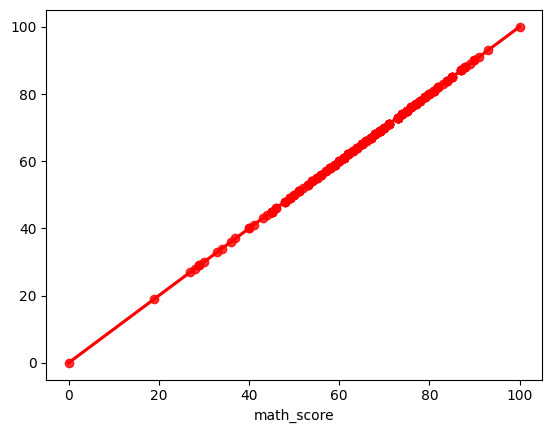

In [34]:
sns.regplot(x=y_test, y=y_hat, ci=None, color='red')

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_hat,'Difference':y_test-y_hat})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-1.421085e-13
737,53,53.0,-4.263256e-14
740,80,80.0,-2.842171e-14
660,74,74.0,-1.421085e-14
411,84,84.0,-1.421085e-13
...,...,...,...
408,52,52.0,5.684342e-14
332,62,62.0,7.105427e-14
208,74,74.0,-5.684342e-14
613,65,65.0,-5.684342e-14
